# Manipulating pytorch datasets

## Modules

In [29]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from torchvision import datasets
from torch.utils.data import Subset
from torch.utils.data import TensorDataset
from torch.utils.data import ConcatDataset
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset,DataLoader

## Load dataset

In [9]:
dataset_path = 'datasets'
batch_size=256
train_dataset = datasets.FashionMNIST(dataset_path, transform=ToTensor(), train=True, download=True)
test_dataset  = datasets.FashionMNIST(dataset_path, transform=ToTensor(), train=False, download=True)

In [8]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

### Show image

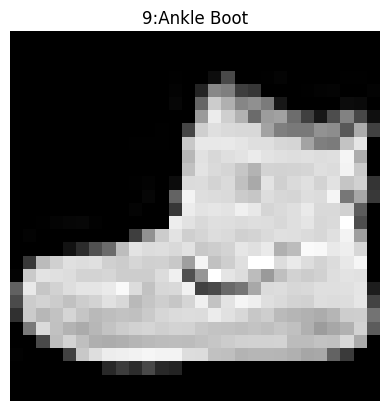

In [4]:
labels_map = {0: "T-Shirt",1: "Trouser",2: "Pullover",3: "Dress",4: "Coat",5: "Sandal",
              6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle Boot"}

img, label = train_dataset[0]
plt.title('{}:{}'.format(label,labels_map[label]))
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Create dataloader

In [5]:
train_loader = DataLoader(dataset=train_dataset, batch_size=256, shuffle=True)

In [7]:
train_features, train_labels = next(iter(train_loader))
print(len(train_labels)) #256

256


## Filter data 

In [11]:
train_idx = np.where((train_dataset.targets==0))[0]
train_subset = Subset(train_dataset, train_idx)
train_loader_subset = DataLoader(train_subset, shuffle=True, batch_size=batch_size)

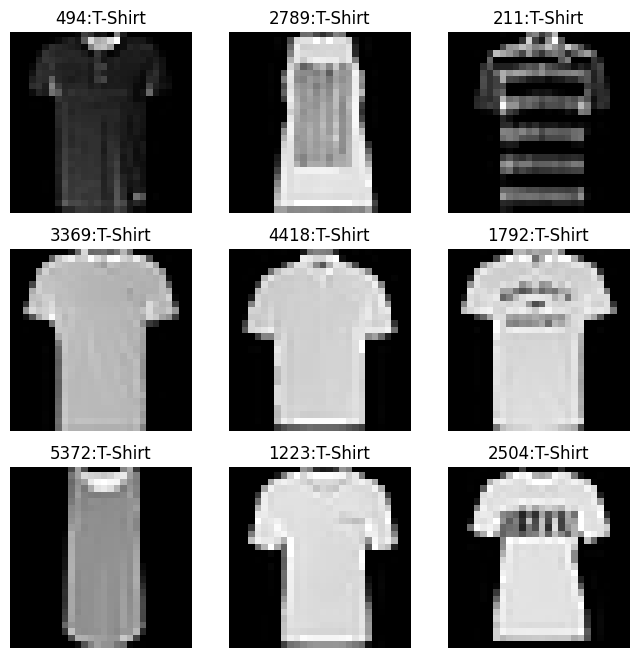

In [20]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  
    sample_idx = torch.randint(len(train_subset), size=(1,)).item()
    img, label = train_subset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title('{}:{}'.format(sample_idx,labels_map[label]))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    
plt.show()

## Concatenate pytorch dataset

In [22]:
dataset = ConcatDataset([train_dataset,test_dataset])
data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

print(len(dataset),len(data_loader) )

70000 274


## From Dataframe to pytorch

In [25]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

boston  = load_breast_cancer()
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df['target'] = boston.target


In [28]:
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
528,13.94,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.066150,0.1976,0.06457,...,15.38,94.52,653.3,0.13940,0.1364,0.1559,0.10150,0.2160,0.07253,1
481,13.90,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.020700,0.1579,0.05594,...,26.42,104.40,830.5,0.10640,0.1415,0.1673,0.08150,0.2356,0.07603,1
387,13.88,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,...,19.97,99.66,745.3,0.08484,0.1233,0.1091,0.04537,0.2542,0.06623,1
147,14.95,18.77,97.84,689.5,0.08138,0.11670,0.09050,0.035620,0.1744,0.06493,...,25.47,107.10,809.7,0.09970,0.2521,0.2500,0.08405,0.2852,0.09218,1
167,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.065760,0.1893,0.05534,...,26.30,130.70,1260.0,0.11680,0.2119,0.2318,0.14740,0.2810,0.07228,0


In [30]:
target = torch.tensor(df['target'].values)
features = torch.tensor(df.drop('target', axis = 1).values)
train = TensorDataset(features, target)
train_loader = DataLoader(train, batch_size=2, shuffle=True)

In [34]:
train_features, train_labels = next(iter(train_loader))
print(train_features)
print(train_labels)

tensor([[1.2580e+01, 1.8400e+01, 7.9830e+01, 4.8900e+02, 8.3930e-02, 4.2160e-02,
         1.8600e-03, 2.9240e-03, 1.6970e-01, 5.8550e-02, 2.7190e-01, 1.3500e+00,
         1.7210e+00, 2.2450e+01, 6.3830e-03, 8.0080e-03, 1.8600e-03, 2.9240e-03,
         2.5710e-02, 2.0150e-03, 1.3500e+01, 2.3080e+01, 8.5560e+01, 5.6410e+02,
         1.0380e-01, 6.6240e-02, 5.5790e-03, 8.7720e-03, 2.5050e-01, 6.4310e-02],
        [1.4110e+01, 1.2880e+01, 9.0030e+01, 6.1650e+02, 9.3090e-02, 5.3060e-02,
         1.7650e-02, 2.7330e-02, 1.3730e-01, 5.7000e-02, 2.5710e-01, 1.0810e+00,
         1.5580e+00, 2.3920e+01, 6.6920e-03, 1.1320e-02, 5.7170e-03, 6.6270e-03,
         1.4160e-02, 2.4760e-03, 1.5530e+01, 1.8000e+01, 9.8400e+01, 7.4990e+02,
         1.2810e-01, 1.1090e-01, 5.3070e-02, 5.8900e-02, 2.1000e-01, 7.0830e-02]],
       dtype=torch.float64)
tensor([1, 1])
